In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict,StratifiedShuffleSplit,cross_validate,cross_validate,ShuffleSplit
from sklearn.decomposition import PCA

In [2]:
# df_score = pd.read_csv("../Feature_selection/ft_important.csv")
# df_score.drop(columns=["Unnamed: 0"], inplace=True)
# df_score

In [3]:
# fti_index = df_score['index'].values
# fti_index = fti_index.astype(dtype=str)
# fti_index = np.insert(fti_index,0,'0')


In [4]:
# ranks = []
# for i in range(len(list_feature)):
#     arr = []
#     for j in range(i+1):
#         arr.append(list_feature[j])
#     ranks.append(arr)
# ranks

In [39]:
df_train = pd.read_csv("../df_new_mean_train.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,3.0,58.0,1.0,450.600000,1.640000,450.600000,526.440000,446.500000,5097.950000,-8.700000,...,80062.392773,0.670011,-0.912051,0.018315,242.648806,21.0,21.0,21.0,-1.714518,3.600000
1,3.0,41.0,0.0,357.000000,1.923077,357.076923,538.840237,356.076923,11891.224852,-1.307692,...,76406.068692,0.850813,-0.498918,-0.076761,974.391877,27.0,27.0,27.0,8.932387,-1.307692
2,3.0,76.0,0.0,478.105263,1.041551,479.052632,345.839335,478.210526,2771.745152,0.315789,...,85871.392384,0.489407,-0.973497,0.262626,25.275439,20.0,20.0,20.0,6.346053,0.526316
3,3.0,27.0,1.0,587.066667,357.262222,587.866667,663.182222,584.533333,6410.382222,-0.800000,...,103785.759900,1.091541,-0.392591,-0.159420,9.601546,16.0,16.0,16.0,11.755690,-0.666667
4,2.0,76.0,0.0,900.600000,95.240000,900.600000,170.440000,905.000000,10025.000000,2.800000,...,81079.175405,0.800294,-0.779998,-0.343434,11.737973,11.0,11.0,11.0,-143.141574,2.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8479,0.0,64.0,0.0,612.800000,29298.560000,611.733333,28027.128889,614.933333,28417.528889,-5.866667,...,100877.375033,0.305497,-1.525075,-0.201948,2438.340543,15.0,15.0,15.0,24.802373,8.571429
8480,3.0,75.0,0.0,418.956522,2734.563327,418.956522,2523.780718,419.478261,8352.075614,-3.565217,...,81455.005289,0.448115,-1.260327,0.309823,32.322927,24.0,24.0,24.0,5.947163,-3.565217
8481,1.0,58.0,1.0,1235.428571,700.244898,1235.714286,897.632653,1248.285714,15626.775510,16.857143,...,81763.393500,0.092227,-1.692873,0.599331,10.950366,8.0,8.0,8.0,18.149394,18.571429
8482,2.0,75.0,1.0,823.800000,4775.560000,824.000000,4056.000000,804.000000,11132.800000,-22.600000,...,66478.783260,1.024300,-0.596278,0.147300,335.316688,11.0,11.0,11.0,4.484999,-20.400000


In [44]:
len(df_train[df_train["0"] == 3])

1813

In [6]:
# df_train = df_train[fti_index]

In [7]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,3.0,58.0,1.0,450.600000,1.640000,450.600000,526.440000,446.500000,5097.950000,-8.700000,...,80062.392773,0.670011,-0.912051,0.018315,242.648806,21.0,21.0,21.0,-1.714518,3.600000
1,3.0,41.0,0.0,357.000000,1.923077,357.076923,538.840237,356.076923,11891.224852,-1.307692,...,76406.068692,0.850813,-0.498918,-0.076761,974.391877,27.0,27.0,27.0,8.932387,-1.307692
2,3.0,76.0,0.0,478.105263,1.041551,479.052632,345.839335,478.210526,2771.745152,0.315789,...,85871.392384,0.489407,-0.973497,0.262626,25.275439,20.0,20.0,20.0,6.346053,0.526316
3,3.0,27.0,1.0,587.066667,357.262222,587.866667,663.182222,584.533333,6410.382222,-0.800000,...,103785.759900,1.091541,-0.392591,-0.159420,9.601546,16.0,16.0,16.0,11.755690,-0.666667
4,2.0,76.0,0.0,900.600000,95.240000,900.600000,170.440000,905.000000,10025.000000,2.800000,...,81079.175405,0.800294,-0.779998,-0.343434,11.737973,11.0,11.0,11.0,-143.141574,2.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8479,0.0,64.0,0.0,612.800000,29298.560000,611.733333,28027.128889,614.933333,28417.528889,-5.866667,...,100877.375033,0.305497,-1.525075,-0.201948,2438.340543,15.0,15.0,15.0,24.802373,8.571429
8480,3.0,75.0,0.0,418.956522,2734.563327,418.956522,2523.780718,419.478261,8352.075614,-3.565217,...,81455.005289,0.448115,-1.260327,0.309823,32.322927,24.0,24.0,24.0,5.947163,-3.565217
8481,1.0,58.0,1.0,1235.428571,700.244898,1235.714286,897.632653,1248.285714,15626.775510,16.857143,...,81763.393500,0.092227,-1.692873,0.599331,10.950366,8.0,8.0,8.0,18.149394,18.571429
8482,2.0,75.0,1.0,823.800000,4775.560000,824.000000,4056.000000,804.000000,11132.800000,-22.600000,...,66478.783260,1.024300,-0.596278,0.147300,335.316688,11.0,11.0,11.0,4.484999,-20.400000


In [8]:
df_train = df_train.replace([np.inf, -np.inf], 0)

In [9]:
x_train = df_train.iloc[:,1:].values    
y_train = df_train.iloc[:,0].values

In [10]:
def apply_pca(x, n):
    pca = PCA(n_components= n)
    result = pca.fit_transform(x)
    return result

In [11]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
# x_train = apply_pca(x_train, len(x_train[0]))

In [12]:
df_test = pd.read_csv("../df_new_mean_test.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,1.0,44.0,1.0,1019.500000,1322.750000,1023.750000,1814.437500,1027.500000,13622.750000,4.000000,...,59369.005195,-0.395614,-1.405612,0.209280,147.535415,9.0,9.0,9.0,29.841092,4.750000
1,1.0,64.0,0.0,1070.500000,210.750000,1070.000000,220.000000,1091.000000,8003.000000,7.250000,...,14338.620840,1.581183,1.756293,-0.133602,8.406926,9.0,9.0,9.0,3.658428,7.250000
2,1.0,69.0,1.0,1089.750000,212.437500,1092.500000,780.750000,1089.750000,4948.437500,-2.750000,...,68352.620089,-0.017632,-1.643916,-0.100000,1.054053,9.0,9.0,9.0,5.429165,-2.250000
3,0.0,68.0,0.0,442.476190,6.820862,441.619048,600.616780,440.380952,7582.331066,-4.857143,...,66255.006625,0.981365,-0.380309,0.179710,11.956238,22.0,22.0,22.0,4.172672,-4.857143
4,0.0,86.0,0.0,702.307692,11491.597633,702.615385,11264.852071,702.307692,24367.289941,2.769231,...,65080.950533,0.923223,-0.621266,0.000000,3.071816,13.0,13.0,13.0,6.103110,2.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,3.0,40.0,1.0,570.875000,71.484375,570.875000,430.484375,573.875000,4805.234375,0.625000,...,79562.344747,0.584774,-1.051400,0.326923,76.133747,17.0,17.0,17.0,7.092578,-1.750000
2118,0.0,51.0,1.0,602.800000,15807.893333,604.266667,14172.728889,599.866667,14175.182222,2.266667,...,80598.806765,0.095878,-1.053186,-0.317312,51.143449,17.0,17.0,17.0,2.935853,0.750000
2119,0.0,77.0,1.0,1001.333333,13557.333333,1004.888889,12702.320988,1018.444444,8031.802469,6.888889,...,44918.959424,0.894128,-0.951440,0.178571,0.792483,10.0,10.0,10.0,3.692256,7.111111
2120,1.0,36.0,0.0,1024.888889,1051.654321,1021.111111,2544.098765,1036.222222,2333.728395,20.666667,...,1689.869824,0.208140,-1.684963,-0.157143,42.377293,10.0,10.0,10.0,3.571234,20.000000


In [13]:
# df_test = df_test[fti_index]

In [14]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,1.0,44.0,1.0,1019.500000,1322.750000,1023.750000,1814.437500,1027.500000,13622.750000,4.000000,...,59369.005195,-0.395614,-1.405612,0.209280,147.535415,9.0,9.0,9.0,29.841092,4.750000
1,1.0,64.0,0.0,1070.500000,210.750000,1070.000000,220.000000,1091.000000,8003.000000,7.250000,...,14338.620840,1.581183,1.756293,-0.133602,8.406926,9.0,9.0,9.0,3.658428,7.250000
2,1.0,69.0,1.0,1089.750000,212.437500,1092.500000,780.750000,1089.750000,4948.437500,-2.750000,...,68352.620089,-0.017632,-1.643916,-0.100000,1.054053,9.0,9.0,9.0,5.429165,-2.250000
3,0.0,68.0,0.0,442.476190,6.820862,441.619048,600.616780,440.380952,7582.331066,-4.857143,...,66255.006625,0.981365,-0.380309,0.179710,11.956238,22.0,22.0,22.0,4.172672,-4.857143
4,0.0,86.0,0.0,702.307692,11491.597633,702.615385,11264.852071,702.307692,24367.289941,2.769231,...,65080.950533,0.923223,-0.621266,0.000000,3.071816,13.0,13.0,13.0,6.103110,2.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2117,3.0,40.0,1.0,570.875000,71.484375,570.875000,430.484375,573.875000,4805.234375,0.625000,...,79562.344747,0.584774,-1.051400,0.326923,76.133747,17.0,17.0,17.0,7.092578,-1.750000
2118,0.0,51.0,1.0,602.800000,15807.893333,604.266667,14172.728889,599.866667,14175.182222,2.266667,...,80598.806765,0.095878,-1.053186,-0.317312,51.143449,17.0,17.0,17.0,2.935853,0.750000
2119,0.0,77.0,1.0,1001.333333,13557.333333,1004.888889,12702.320988,1018.444444,8031.802469,6.888889,...,44918.959424,0.894128,-0.951440,0.178571,0.792483,10.0,10.0,10.0,3.692256,7.111111
2120,1.0,36.0,0.0,1024.888889,1051.654321,1021.111111,2544.098765,1036.222222,2333.728395,20.666667,...,1689.869824,0.208140,-1.684963,-0.157143,42.377293,10.0,10.0,10.0,3.571234,20.000000


In [15]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [16]:
x_test = scale.transform(x_test)
# x_test = apply_pca(x_test, len(x_test[0]))

In [17]:
# Create based model
level0 = list()
level0.append(('RF', RandomForestClassifier(criterion='gini', max_depth=5, max_features='sqrt', n_estimators=1000)))
level0.append(('AB', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.1, n_estimators=100)))
level0.append(('GB', GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.1,loss= 'log_loss',n_estimators= 100)))
level0.append(('XGB', XGBClassifier(gamma= 0.2,learning_rate= 0.1,max_depth= 4,min_child_weight= 1,n_estimators= 100)))
level0.append(('LGB', LGBMClassifier(boosting= 'dart', data_sample_strategy= 'bagging', estimators= 50, learning_rate=0.1, objective= 'multiclass')))


level1 = list()
level1.append(('LR', LogisticRegression(C= 10, max_iter= 100, penalty= 'l1', solver= 'liblinear')))
level1.append(('SVM', SVC(C= 100, gamma= 'scale', kernel= 'rbf', probability= True)))
level1.append(('DT', DecisionTreeClassifier(criterion= 'entropy',max_depth= 5,max_features= 'sqrt',splitter= 'best')))
level1.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 4, p= 1, weights= 'uniform')))
level1.append(('CB', CatBoostClassifier(iterations= 200, learning_rate=0.1)))

In [18]:
from sklearn.model_selection import KFold,StratifiedKFold,StratifiedShuffleSplit,StratifiedGroupKFold
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=10,random_state=None)

train_news = np.empty((x_train.shape[0], 0))
test_news = np.empty((x_test.shape[0], 0))

for name, model in level0:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        print(f"Fold {i}")
        print(f"train: {len(train_index)}")
        print(f"test: {len(test_index)}")
        # Train model in 4/5
        model.fit(x_train[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(x_train[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(x_train, y_train)
    test_model = model.predict(x_test)
    # Add column to news data
    train_news = np.column_stack((train_news, np.array(train_model).reshape(-1, 1)))
    test_news = np.column_stack((test_news, np.array(test_model).reshape(-1, 1)))
    print("-------Done-------")


Model: RF
----------------
Fold 0
train: 7635
test: 849
Fold 1
train: 7635
test: 849
Fold 2
train: 7635
test: 849
Fold 3
train: 7635
test: 849
Fold 4
train: 7636
test: 848
Fold 5
train: 7636
test: 848
Fold 6
train: 7636
test: 848
Fold 7
train: 7636
test: 848
Fold 8
train: 7636
test: 848
Fold 9
train: 7636
test: 848
-------Done-------
Model: AB
----------------
Fold 0
train: 7635
test: 849
Fold 1
train: 7635
test: 849
Fold 2
train: 7635
test: 849
Fold 3
train: 7635
test: 849
Fold 4
train: 7636
test: 848
Fold 5
train: 7636
test: 848
Fold 6
train: 7636
test: 848
Fold 7
train: 7636
test: 848
Fold 8
train: 7636
test: 848
Fold 9
train: 7636
test: 848
-------Done-------
Model: GB
----------------
Fold 0
train: 7635
test: 849
Fold 1
train: 7635
test: 849
Fold 2
train: 7635
test: 849
Fold 3
train: 7635
test: 849
Fold 4
train: 7636
test: 848
Fold 5
train: 7636
test: 848
Fold 6
train: 7636
test: 848
Fold 7
train: 7636
test: 848
Fold 8
train: 7636
test: 848
Fold 9
train: 7636
test: 848
-------Done

In [19]:
# train_news_final = pd.read_csv("../train_news_final.csv")
# train_news_final.drop(columns=['Unnamed: 0'],inplace=True)
# test_news_final = pd.read_csv("../test_news_final.csv")
# test_news_final.drop(columns=['Unnamed: 0'],inplace=True)
# train_news_final = train_news_final.to_numpy()
# test_news_final = test_news_final.to_numpy()
# pd.DataFrame(train_news_final).to_csv("../train_news_final_split10.csv")

In [32]:
# warnings.filterwarnings('ignore')

# train_news_final = np.empty((train_news.shape[0], 0))
# test_news_final = np.empty((test_news.shape[0], 0))
train_news_final = train_news
test_news_final = test_news

# for name, model in level1:
#     print(f"Model: {name}")
#     print("----------------")
#     train_model = []
#     for i,(train_index, test_index) in enumerate(kf.split(train_news, y_train)):
#         print(f"Fold {i}")
#         # Train model in 4/5
#         model.fit(train_news[train_index], y_train[train_index])
#         # predict model in 1/5
#         y_pred = model.predict(train_news[test_index])
#         train_model.extend(y_pred)
#     # Predict on test set
#     model.fit(train_news, y_train)
#     test_model = model.predict(test_news)
#     # Add column to news data
#     train_news_final = np.column_stack((train_news_final, np.array(train_model).reshape(-1, 1)))
#     test_news_final = np.column_stack((test_news_final, np.array(test_model).reshape(-1, 1)))
#     print("-------Done-------")

In [21]:
# pd.DataFrame(train_news_final).to_csv("../train_news_final_split15.csv")
# pd.DataFrame(test_news_final).to_csv("../test_news_final_split15.csv")

In [22]:
# train_news_final = pd.read_csv("../train_news_final_split15.csv")
# test_news_final = pd.read_csv("../test_news_final_split15.csv")
# train_news_final.drop(columns=["Unnamed: 0"], inplace=True)
# test_news_final.drop(columns=["Unnamed: 0"], inplace=True)
# train_news_final = train_news_final.values
# test_news_final = test_news_final.values

In [23]:
# # KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = KNeighborsClassifier()
# params = {
#     'n_neighbors': [4,5,6],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'p': [1,2,3]
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=10, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [24]:
# # LogisticRegression
# from sklearn.model_selection import GridSearchCV
# meta_model = LogisticRegression()
# params = {
#     'penalty': ['l1', 'l2'],
#     'C': [ 0.01,0.1,1, 10],
#     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
#     'max_iter': [100,200]
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=10, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [25]:
# # XGBClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = XGBClassifier()
# params = {
#     'n_estimators': [10,50,100,1000],
#     'learning_rate': [0.01,0.1,1,10],
#     'max_depth': [3,4,5],
#     'min_child_weight':[1],
#     'gamma':[0,0.1,0.2],
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=10, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [26]:
# # XGBClassifier
# from sklearn.model_selection import GridSearchCV
# meta_model = SVC()
# params = {
#     'kernel': ['rbf', 'sigmoid', 'poly', 'linear'],
#     'C': [0.01, 0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto'],
#     'probability': [True]
# }
# GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=10, verbose=5)
# GS.fit(train_news_final, y_train)
# GS.best_estimator_

In [33]:
# RandomForest
from sklearn.model_selection import GridSearchCV
meta_model = AdaBoostClassifier()
params = {
    'n_estimators': [10,50,100,1000],
    'learning_rate': [0.01,0.1,1,10],
    'algorithm': ['SAMME', 'SAMME.R'],
}
GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=10, verbose=5)
GS.fit(train_news_final, y_train)
GS.best_estimator_

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.558 total time=   0.0s
[CV 2/10] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.557 total time=   0.0s
[CV 3/10] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.569 total time=   0.0s
[CV 4/10] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.564 total time=   0.0s
[CV 5/10] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.566 total time=   0.0s
[CV 6/10] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.572 total time=   0.0s
[CV 7/10] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.566 total time=   0.0s
[CV 8/10] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.570 total time=   0.0s
[CV 9/10] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.566 total time=   0.0s
[CV 10/10] END algorithm=SAMME, learn

AdaBoostClassifier(learning_rate=0.01, n_estimators=1000)

In [34]:
best_model = GS.best_estimator_
y_pred = best_model.predict(test_news_final)

In [35]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

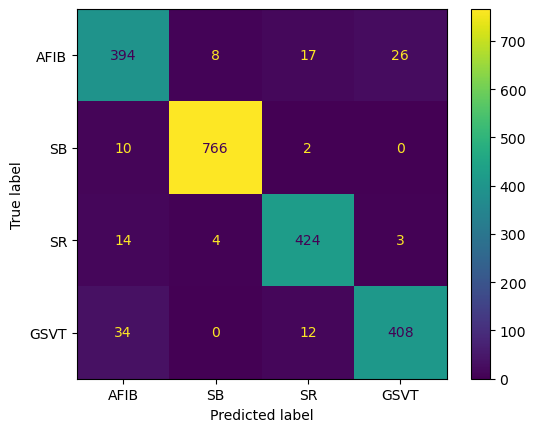

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.948633,0.885393,0.871681,0.878484,0.965414
1,SB,0.988690,0.984576,0.984576,0.984576,0.991071
2,SR,0.975495,0.952809,0.931868,0.942222,0.981515
3,GSVT,0.964656,0.898678,0.933638,0.915825,0.982614
4,macro avg,NaN,0.930277,0.930441,0.930364,NaN
5,micro avg,NaN,0.938737,0.938737,0.938737,NaN
6,weighted avg,NaN,0.938736,0.938950,0.938737,NaN


In [36]:
evaluation_test = evaluation_test(y_test,y_pred)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [37]:
# df_evaluation_test.to_csv("../Result/Stacking_multipleClass_frequency_split15_cv10_AB.csv")